In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [3]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [4]:
tf.test.is_built_with_cuda()

True

In [5]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [6]:
X_train

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [7]:
X_train.shape

(50000, 32, 32, 3)

In [8]:
y_train[0]

array([6], dtype=uint8)

In [9]:
def plot_sample(index):
    plt.figure(figsize=(10, 1))
    plt.imshow(X_train[index])

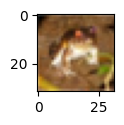

In [10]:
plot_sample(0)

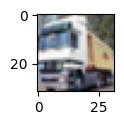

In [11]:
plot_sample(1)

In [12]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [13]:
y_train[3]

array([4], dtype=uint8)

In [14]:
classes[y_train[3][0]]

'deer'

In [15]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [16]:
X_train_scaled.shape

(50000, 32, 32, 3)

In [17]:
y_train_categorical = keras.utils.to_categorical(
    y_train, num_classes=10, dtype='float32'
)
y_train_categorical[:5]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [18]:
y_test_categorical = keras.utils.to_categorical(
    y_test, num_classes=10, dtype='float32'
)
y_test_categorical[:5]

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]], dtype=float32)

In [19]:
X_train[0].shape

(32, 32, 3)

In [20]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32, 32, 3)),
    keras.layers.Dense(3000, activation='relu'),
    keras.layers.Dense(1000, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid'),
])

model.compile(optimizer='SGD',
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_scaled, y_train_categorical, epochs=50)

Epoch 1/50
1563/1563 [==============================] - 6s 3ms/step - loss: 1.8117 - accuracy: 0.3551
Epoch 2/50
1563/1563 [==============================] - 4s 3ms/step - loss: 1.6247 - accuracy: 0.4264
Epoch 3/50
1563/1563 [==============================] - 4s 3ms/step - loss: 1.5395 - accuracy: 0.4565
Epoch 4/50
1563/1563 [==============================] - 4s 3ms/step - loss: 1.4797 - accuracy: 0.4806
Epoch 5/50
1563/1563 [==============================] - 4s 3ms/step - loss: 1.4320 - accuracy: 0.4957
Epoch 6/50
1563/1563 [==============================] - 4s 3ms/step - loss: 1.3892 - accuracy: 0.5119
Epoch 7/50
1563/1563 [==============================] - 4s 3ms/step - loss: 1.3492 - accuracy: 0.5247
Epoch 8/50
1563/1563 [==============================] - 4s 3ms/step - loss: 1.3164 - accuracy: 0.5383
Epoch 9/50
1563/1563 [==============================] - 4s 3ms/step - loss: 1.2821 - accuracy: 0.5486
Epoch 10/50
1563/1563 [==============================] - 4s 3ms/step - loss: 1.251

In [21]:
classes[y_test[1][0]]

'ship'

In [22]:
classes[np.argmax(model.predict(X_test_scaled)[1])]

313/313 [==============================] - 0s 984us/step


'ship'

In [23]:
def get_model():
    model = keras.Sequential([
        keras.layers.Flatten(input_shape=(32, 32, 3)),
        keras.layers.Dense(3000, activation='relu'),
        keras.layers.Dense(1000, activation='relu'),
        keras.layers.Dense(10, activation='sigmoid'),
    ])
    
    model.compile(optimizer='SGD',
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])

    model.fit(X_train_scaled, y_train_categorical, epochs=50)
    return model

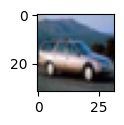

In [24]:
plot_sample(y_test[5555][0])

In [25]:
X_test.shape

(10000, 32, 32, 3)

In [26]:
classes[np.argmax(model.predict(X_test_scaled)[5555])]

313/313 [==============================] - 0s 1ms/step


'bird'

In [27]:
print(X_test_scaled[0].shape)
X_test_scaled[0]

(32, 32, 3)


array([[[0.61960784, 0.43921569, 0.19215686],
        [0.62352941, 0.43529412, 0.18431373],
        [0.64705882, 0.45490196, 0.2       ],
        ...,
        [0.5372549 , 0.37254902, 0.14117647],
        [0.49411765, 0.35686275, 0.14117647],
        [0.45490196, 0.33333333, 0.12941176]],

       [[0.59607843, 0.43921569, 0.2       ],
        [0.59215686, 0.43137255, 0.15686275],
        [0.62352941, 0.44705882, 0.17647059],
        ...,
        [0.53333333, 0.37254902, 0.12156863],
        [0.49019608, 0.35686275, 0.1254902 ],
        [0.46666667, 0.34509804, 0.13333333]],

       [[0.59215686, 0.43137255, 0.18431373],
        [0.59215686, 0.42745098, 0.12941176],
        [0.61960784, 0.43529412, 0.14117647],
        ...,
        [0.54509804, 0.38431373, 0.13333333],
        [0.50980392, 0.37254902, 0.13333333],
        [0.47058824, 0.34901961, 0.12941176]],

       ...,

       [[0.26666667, 0.48627451, 0.69411765],
        [0.16470588, 0.39215686, 0.58039216],
        [0.12156863, 0

In [28]:
classes[y_test[555][0]]

'deer'

In [44]:
import requests

# URL of your BentoML service
url = "http://localhost:3000/predict"

# Send a POST request with the test image
response = requests.post(url, json=X_test[0].tolist())

# Decode the response (assuming the model returns class probabilities)
predicted_probs = np.array(response.json())

# Get the predicted class index
predicted_class = np.argmax(predicted_probs, axis=1)[0]

AxisError: axis 1 is out of bounds for array of dimension 1

In [43]:
X_test[0].shape

(32, 32, 3)

In [41]:
y_test[0]

array([3], dtype=uint8)

In [ ]:
import bentoml

# Assuming your model is named 'model'
model.save('model')

# Save the model with BentoML
bentoml.keras.save_model('cifar10_ann_model', model)

INFO:tensorflow:Assets written to: model\assets
INFO:tensorflow:Assets written to: C:\Users\smitg\AppData\Local\Temp\tmp3mw3edh5bentoml_model_cifar10_ann_model\assets


Model(tag="cifar10_ann_model:5mmdltbxpozdzmaz", path="C:\Users\smitg\bentoml\models\cifar10_ann_model\5mmdltbxpozdzmaz\")

In [ ]:
# %%timeit -n1 -r1
# with tf.device('/CPU:0'):
#     cpu_model = get_model()
#     cpu_model.fit(X_train_scaled, y_train_categorical, epochs=1)

In [ ]:
# %%timeit -n1 -r1
# with tf.device('/GPU:0'):
#     cpu_model = get_model()
#     cpu_model.fit(X_train_scaled, y_train_categorical, epochs=1)